# Processamento de Linguagem Natural (PLN)
_Natural Language Processing (NLP) em Inglês_

## Análise de Sentimentos - Twitter

Identificar se o tweet é **racista/sexista** ou **não**

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import nltk # pip install nltk
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer

import re

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix

 #nltk.download() # descomente para instalar pacotes

### Ler dados

In [94]:
train = pd.read_csv('twitter/train.csv')
test = pd.read_c
sv('twitter/test.csv')

AttributeError: module 'pandas' has no attribute 'read_c'

In [38]:
train.shape, test.shape

((31962, 3), (17197, 2))

In [39]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [40]:
test.head()

,id,tweet
0,31963,studiolife aislife requires passion dedication...
1,31964,white supremacists want everyone to see the ...
2,31965,safe ways to heal your acne altwaystoheal h...
3,31966,is the hp and the cursed child book up for res...
4,31967,3rd bihday to my amazing hilarious nephew el...


## Pré-processamento de Dados

### Tirar pontuações e caracteres especiais

In [41]:
def limpa_texto(data, col):
    """
    Tira pontuações e caracteres especiais, recebendo um dataframe (data) e uma coluna (col)
    """
    data[col] = data[col].str.lower()
    data[col] = data[col].apply(lambda x: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "",x))

In [42]:
limpa_texto(train, 'tweet')

In [43]:
limpa_texto(test, 'tweet')

### Remover palavras comuns

In [44]:
def remove_palavras_comuns(data, col):
    palavras_comuns = stopwords.words('english')
    lista_de_lista_de_palavras = data['tweet'].str.split()
    for idx, _ in data.iterrows():
        data[col].at[idx] = [palavra for palavra in lista_de_lista_de_palavras[idx] \
                             if palavra not in palavras_comuns]

In [45]:
remove_palavras_comuns(train, 'tweet')

In [46]:
remove_palavras_comuns(test, 'tweet')

### Remover variações da mesma palavra

In [47]:
def tira_variacoes_de_palavras(data, col):
    tira_variacao = WordNetLemmatizer()
    for idx, _ in data.iterrows():
        data[col].at[idx] = [tira_variacao.lemmatize(palavra,'v') \
                             for palavra in data[col][idx]]

In [48]:
tira_variacoes_de_palavras(train, 'tweet')

In [49]:
tira_variacoes_de_palavras(test, 'tweet')

### Engenharia de Recursos (Feature Engineering ) 
#### Quantidade de palavras por tweet

In [50]:
train['palavras'] = train['tweet'].apply(len)

In [51]:
test['palavras'] = test['tweet'].apply(len)

## Análise Exploratória de Dados (AED)

### Distribuição das quantidades de palavras por "label"

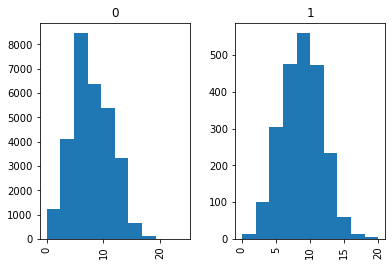

In [52]:
train.hist(column=['palavras'], by='label')
plt.show()

### Quantidade de cada "label"

/home/laiany/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


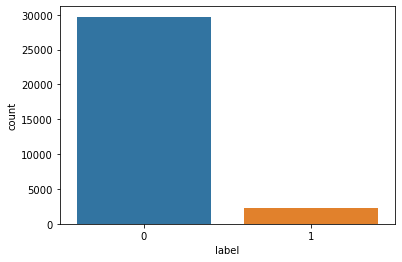

In [53]:
sns.countplot('label', data=train)
plt.show()

### Palavras frequêntes

#### Averiguar palavras mais frequêntes classificadas como "racistas ou sexistas"

In [54]:
lista_de_listas = train.loc[train['label']==1]['tweet'].values
lista_de_listas

array([list(['cnn', 'call', 'michigan', 'middle', 'school', 'build', 'wall', 'chant', 'tcot']),
       list(['comment', 'australia', 'opkillingbay', 'seashepherd', 'helpcovedolphins', 'thecove', 'helpcovedolphins']),
       list(['retweet', 'agree']), ...,
       list(['dont', 'ball', 'hashtag', 'say', 'weasel', 'away', 'lumpy', 'tony', 'dipshit']),
       list(['make', 'ask', 'anybody', 'god', 'oh', 'thank', 'god']),
       list(['sikh', 'temple', 'vandalise', 'calgary', 'wso', 'condemn', 'act'])],
      dtype=object)

In [55]:
palavras = [palavra for lista in lista_de_listas for palavra in lista]

In [56]:
len(palavras)

18596

In [57]:
import collections

In [58]:
def gera_freq_palavras(lista):
    return collections.Counter(lista)

In [59]:
freq_palavras = gera_freq_palavras(palavras)

In [60]:
len(freq_palavras)

5285

In [61]:
lista_de_palavras = []
lista_de_frequencias = []
for palavra, frequencia in freq_palavras.items():
    lista_de_palavras.append(palavra)
    lista_de_frequencias.append(frequencia)

In [62]:
data_freq = pd.DataFrame({'palavra': lista_de_palavras, 'freq': lista_de_frequencias})

In [63]:
data_freq.sort_values('freq', ascending=False, inplace=True)

In [64]:
dict(data_freq[:10].values)

{'amp': 283,
 'trump': 216,
 'white': 153,
 'libtard': 149,
 'black': 146,
 'like': 141,
 'racist': 103,
 'politics': 97,
 'say': 96,
 'people': 95}

### Nuvem de Palavras 

In [67]:
# pip install wordcloud
from wordcloud import WordCloud

In [68]:
nuvem = WordCloud(background_color='white')

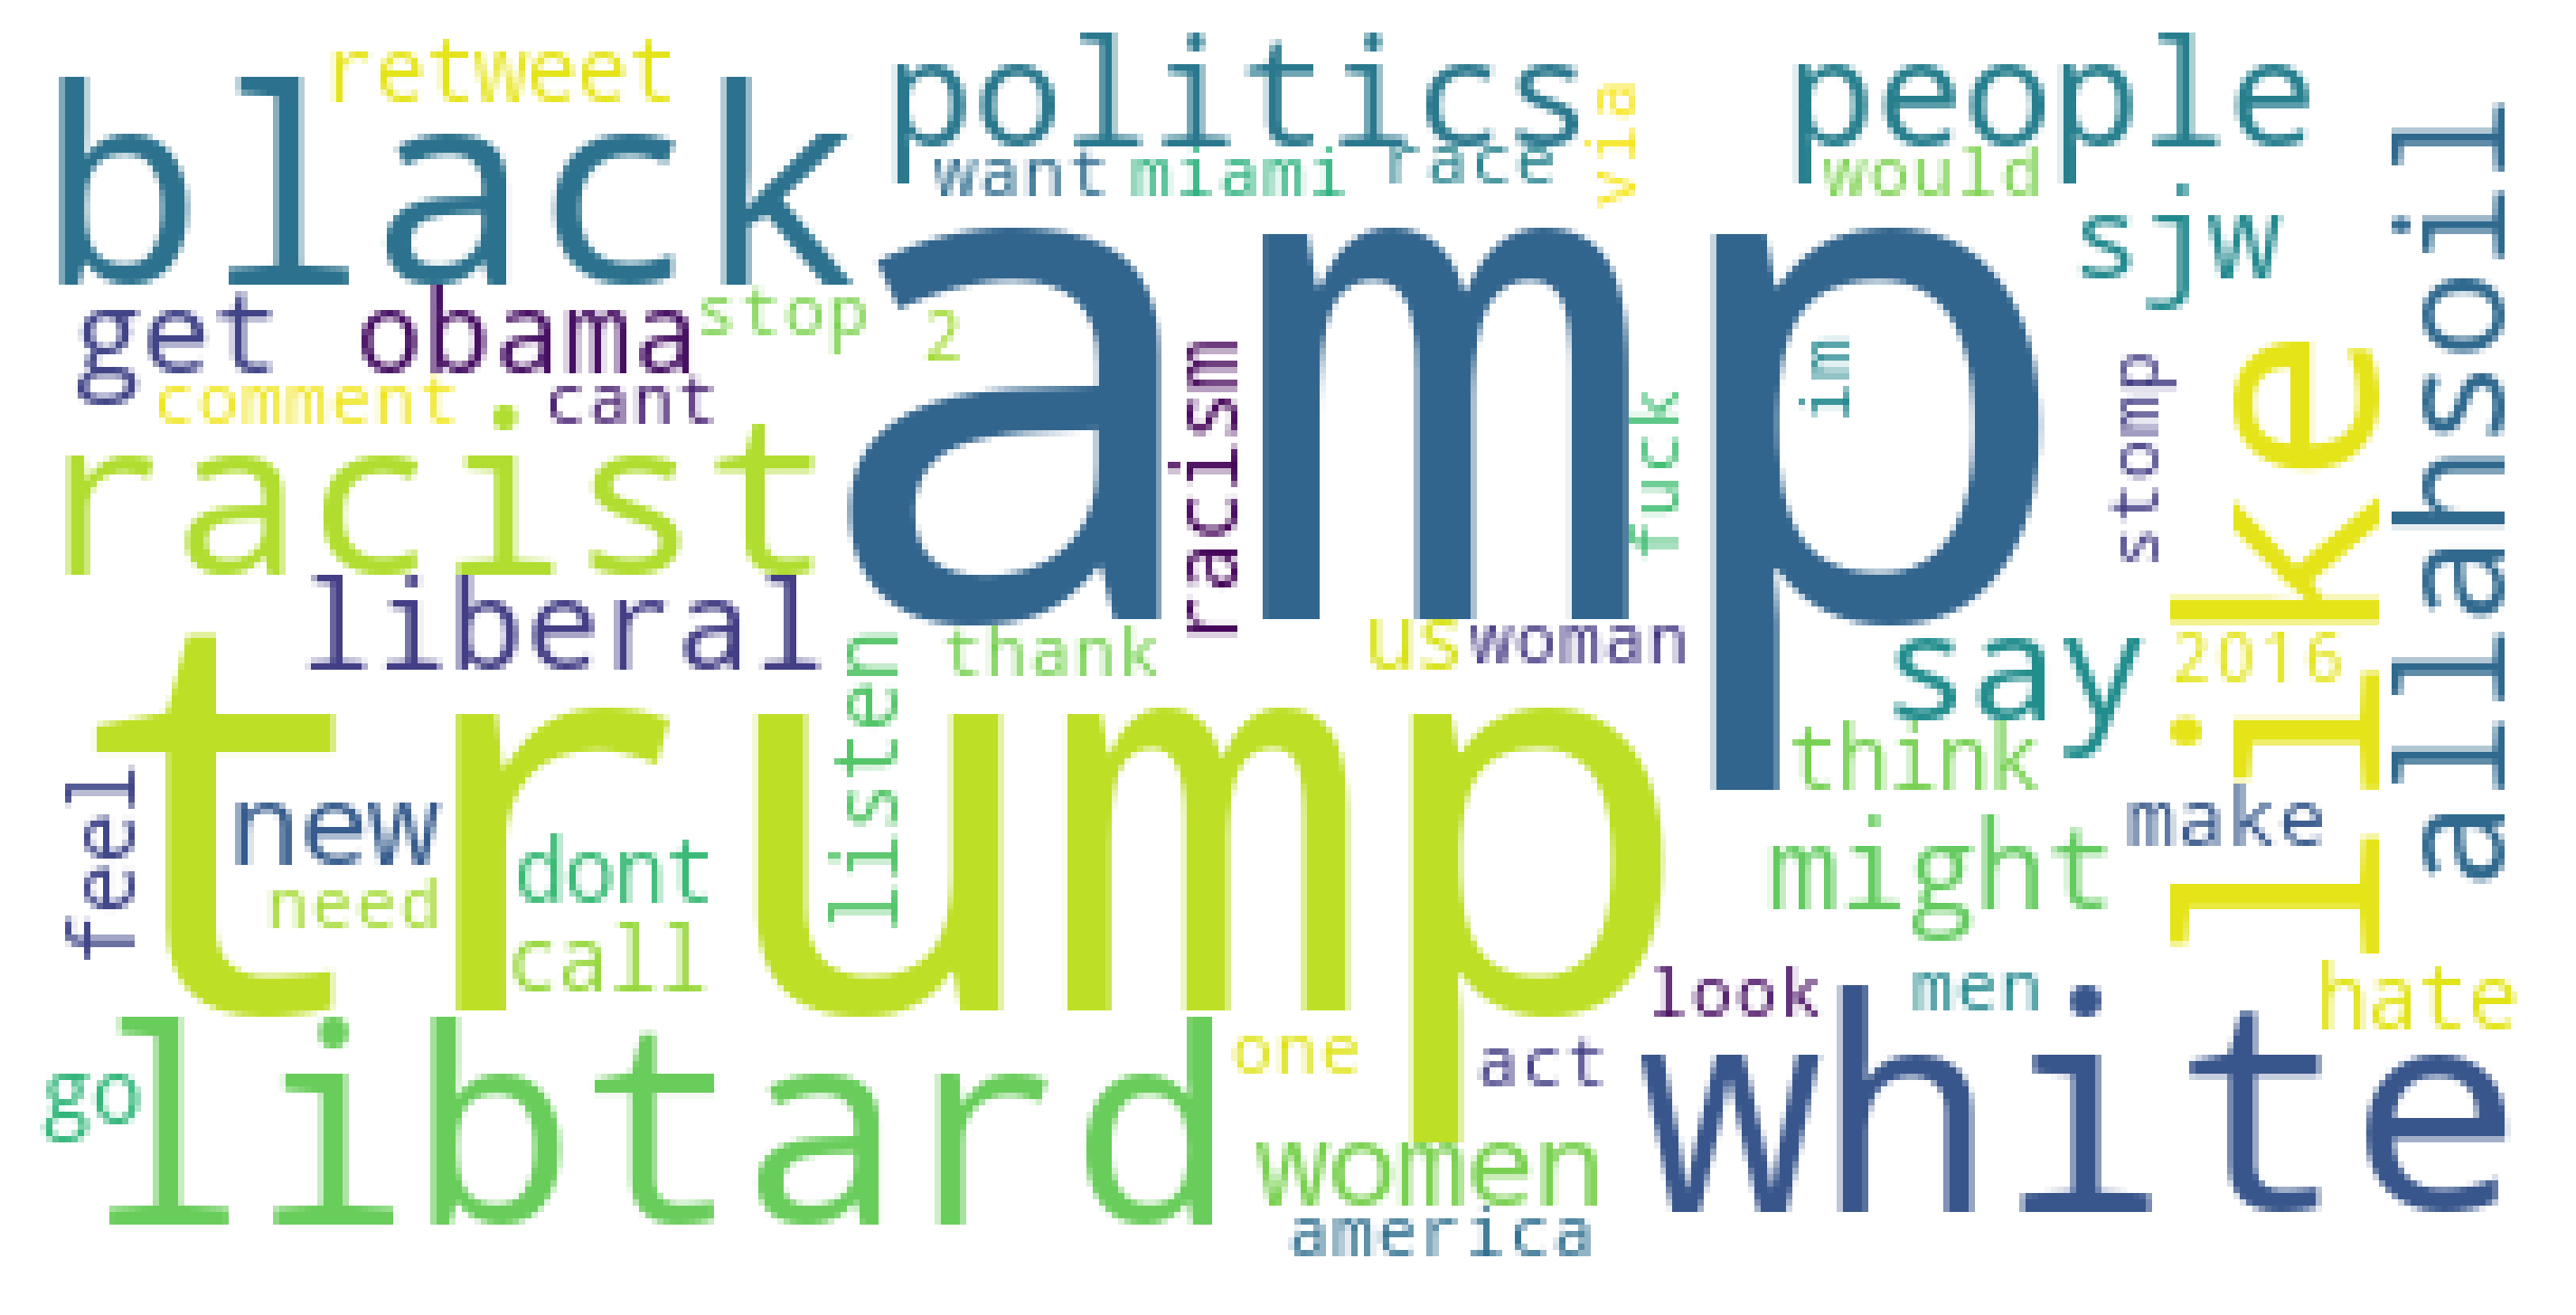

In [69]:
plt.figure(figsize=(12,8), dpi=300)
nuvem.generate_from_frequencies(dict(data_freq[:50].values))
plt.imshow(nuvem)
plt.axis('off')
plt.show()

### Retornar para formato de texto

In [70]:
train['tweet'] = train['tweet'].apply(lambda x: ' '.join(x))

In [71]:
test['tweet'] = test['tweet'].apply(lambda x: ' '.join(x))

###  Solucionar problema de desequilibrio dos dados

In [72]:
train['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [73]:
from sklearn.utils import resample

In [74]:
def equilibra_dados(train, pra_mais=True):
    train_minoria = train.loc[train['label']==1]
    train_maioria = train.loc[train['label']==0]
    if pra_mais:
        menor_pro_maior = resample(train_minoria, 
                           replace=True, 
                           n_samples=len(train_maioria), 
                           random_state=123)
        train_equilibrado = pd.concat([menor_pro_maior, train_maioria])
    else:
        maior_pro_menor = resample(train_maioria, 
                           replace=True, 
                           n_samples=len(train_minoria), 
                           random_state=123)
        train_equilibrado = pd.concat([maior_pro_menor, train_minoria])
    return train_equilibrado

In [75]:
train_equilibrado = equilibra_dados(train, pra_mais=True)

In [76]:
len(train_equilibrado)

59440

In [77]:
train_equilibrado['label'].value_counts()

1    29720
0    29720
Name: label, dtype: int64

## Treinar Modelo

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
X = train_equilibrado['tweet']
y = train_equilibrado['label']

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [81]:
X_train.shape, y_train.shape

((41608,), (41608,))

In [82]:
X_test.shape, y_test.shape

((17832,), (17832,))

In [83]:
sgd = Pipeline([
    ('countVector', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('modelo', SGDClassifier())
])

In [84]:
sgd.fit(X_train, y_train)

Pipeline(steps=[('countVector', CountVectorizer()),
                ('tfidf', TfidfTransformer()), ('modelo', SGDClassifier())])

In [85]:
sgd_pred = sgd.predict(X_test)

In [86]:
sgd_pred

array([0, 1, 1, ..., 1, 0, 1])

## Avaliar Performance do Modelo

In [87]:
from sklearn.metrics import f1_score

In [88]:
sgd_score = f1_score(y_test, sgd_pred)

In [89]:
sgd_score

0.9669540229885057

In [90]:
y_pred = sgd.predict(test['tweet'])
y_pred

array([0, 1, 0, ..., 1, 0, 0])

## Submissão

In [91]:
submissao = pd.DataFrame({'id': test['id'], 'label': y_pred})

In [92]:
submissao.head()

,id,label
0,31963,0
1,31964,1
2,31965,0
3,31966,0
4,31967,0


In [93]:
submissao.to_csv('pred_twitter.csv', index=False)

Fontes (em inglês):
* http://bit.ly/NLP-Twitter
* http://bit.ly/NLP-Twitter-Competition